In [7]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import glob
import math 

In [33]:
def calcular_cantidad_reducciones(width, final_width, porcentaje_reduccion):
    if final_width >= width:
        raise ValueError("El tamaño final debe ser menor que el tamaño original.")

    cantidad_reducciones = 0
    while width > final_width:
        width *= porcentaje_reduccion
        cantidad_reducciones += 1

    return cantidad_reducciones

def template_matching(imgList, template_path, threshold):
    """
    imgList: list of images
    template_path: template image
    threshold: threshold value
    """
    template = cv.imread(template_path)
    template_rgb= cv.cvtColor(template, cv.COLOR_BGR2RGB)
    template_gray= cv.cvtColor(template, cv.COLOR_BGR2GRAY)
    # Aplicar deteccion de bordes
    template_gray = cv.Canny(template_gray, 400, 400)

    # Invertir la imagen template
    template_gray = cv.bitwise_not(template_gray)

    for image in imgList:
        img = cv.imread(image)
        img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        
        # Aplicar deteccion de bordes
        img_gray = cv.Canny(img_gray, 400, 400)
        # Invertimos
        img_gray = cv.bitwise_not(img_gray)

        w_img, h_img = img_gray.shape[::-1]

        # img_copy = img_rgb.copy()
        template_copy = template_gray.copy()
        w, h = template_gray.shape[::-1]

        # Si el template es mas chico que la imagen, los pongo al mismo tamaño
        if (w < w_img):
            template_copy = cv.resize(template_copy, (img_gray.shape[1], int(img_gray.shape[1]*template_copy.shape[0]/template_copy.shape[1])))
            w, h = template_gray.shape[::-1]

        # Calcular cantidad de reducciones del template segun el tamaño de la imagen
        porcentaje_reduccion = 0.97
        cantidad_reducciones = calcular_cantidad_reducciones(w_img, w_img//5, porcentaje_reduccion)

        print("Cantidad de reducciones: ", cantidad_reducciones)

        for i in range(int(cantidad_reducciones)):
            # print("Reduccion: ", i)
            print("Tamaño template: ", template_copy.shape)
            # print("Tamaño imagen: ", img_gray.shape)                

            # Si el template es mas chico que la imagen, continuo
            if w < w_img and h < h_img:
                res = cv.matchTemplate(img_gray,template_copy,cv.TM_CCOEFF_NORMED)
                loc = np.where( res >= threshold)

                if (len(loc[0]) > 1):
                    print("Se encontraron ", len(loc[0]), " coincidencias.")
                    for pt in zip(*loc[::-1]):
                        cv.rectangle(img_gray, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
                    break

            template_copy = cv.resize(template_copy, (0,0), fx=porcentaje_reduccion, fy=porcentaje_reduccion)
            w, h = template_copy.shape[::-1]

        plt.figure()
        plt.imshow(template_copy, cmap='gray')
        plt.show()

        plt.figure()
        plt.imshow(img_gray, cmap='gray')
        plt.show()

    return





Cantidad de reducciones:  54
Tamaño template:  (175, 400)
Tamaño template:  (170, 388)
Tamaño template:  (165, 376)
Tamaño template:  (160, 365)
Tamaño template:  (155, 354)
Tamaño template:  (150, 343)
Tamaño template:  (146, 333)
Tamaño template:  (142, 323)
Tamaño template:  (138, 313)
Tamaño template:  (134, 304)
Tamaño template:  (130, 295)
Tamaño template:  (126, 286)
Tamaño template:  (122, 277)
Tamaño template:  (118, 269)
Tamaño template:  (114, 261)
Tamaño template:  (111, 253)
Tamaño template:  (108, 245)
Tamaño template:  (105, 238)
Tamaño template:  (102, 231)
Tamaño template:  (99, 224)
Tamaño template:  (96, 217)
Tamaño template:  (93, 210)
Tamaño template:  (90, 204)
Tamaño template:  (87, 198)
Tamaño template:  (84, 192)
Tamaño template:  (81, 186)
Tamaño template:  (79, 180)
Tamaño template:  (77, 175)
Se encontraron  10  coincidencias.


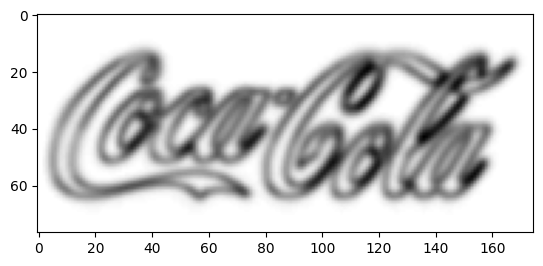

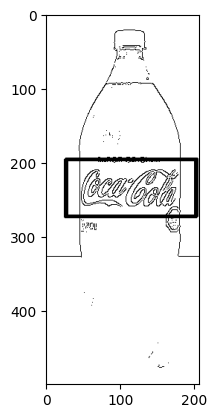

Cantidad de reducciones:  54
Tamaño template:  (175, 400)
Tamaño template:  (170, 388)
Tamaño template:  (165, 376)
Tamaño template:  (160, 365)
Tamaño template:  (155, 354)
Tamaño template:  (150, 343)
Tamaño template:  (146, 333)
Tamaño template:  (142, 323)
Tamaño template:  (138, 313)
Tamaño template:  (134, 304)
Tamaño template:  (130, 295)
Tamaño template:  (126, 286)
Tamaño template:  (122, 277)
Tamaño template:  (118, 269)
Tamaño template:  (114, 261)
Tamaño template:  (111, 253)
Tamaño template:  (108, 245)
Tamaño template:  (105, 238)
Tamaño template:  (102, 231)
Tamaño template:  (99, 224)
Tamaño template:  (96, 217)
Tamaño template:  (93, 210)
Tamaño template:  (90, 204)
Tamaño template:  (87, 198)
Tamaño template:  (84, 192)
Tamaño template:  (81, 186)
Tamaño template:  (79, 180)
Tamaño template:  (77, 175)
Tamaño template:  (75, 170)
Tamaño template:  (73, 165)
Tamaño template:  (71, 160)
Tamaño template:  (69, 155)
Tamaño template:  (67, 150)
Tamaño template:  (65, 146)


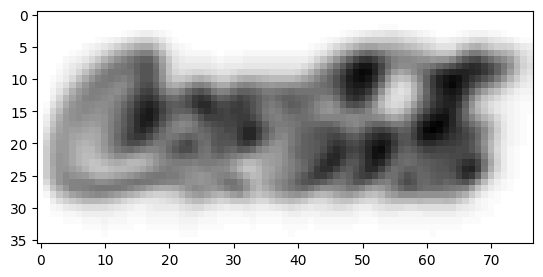

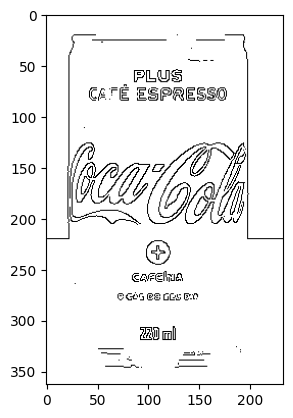

Cantidad de reducciones:  53
Tamaño template:  (312, 715)
Tamaño template:  (303, 694)
Tamaño template:  (294, 673)
Tamaño template:  (285, 653)
Tamaño template:  (276, 633)
Tamaño template:  (268, 614)
Tamaño template:  (260, 596)
Tamaño template:  (252, 578)
Tamaño template:  (244, 561)
Tamaño template:  (237, 544)
Tamaño template:  (230, 528)
Tamaño template:  (223, 512)
Tamaño template:  (216, 497)
Tamaño template:  (210, 482)
Tamaño template:  (204, 468)
Tamaño template:  (198, 454)
Tamaño template:  (192, 440)
Tamaño template:  (186, 427)
Tamaño template:  (180, 414)
Tamaño template:  (175, 402)
Tamaño template:  (170, 390)
Tamaño template:  (165, 378)
Tamaño template:  (160, 367)
Tamaño template:  (155, 356)
Tamaño template:  (150, 345)
Tamaño template:  (146, 335)
Tamaño template:  (142, 325)
Tamaño template:  (138, 315)
Tamaño template:  (134, 306)
Tamaño template:  (130, 297)
Tamaño template:  (126, 288)
Tamaño template:  (122, 279)
Tamaño template:  (118, 271)
Tamaño templat

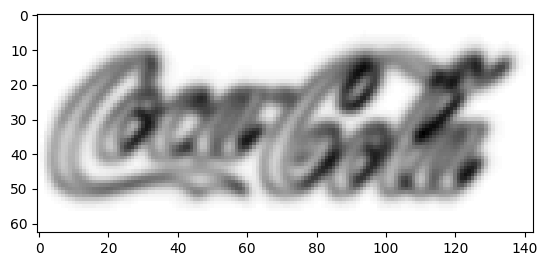

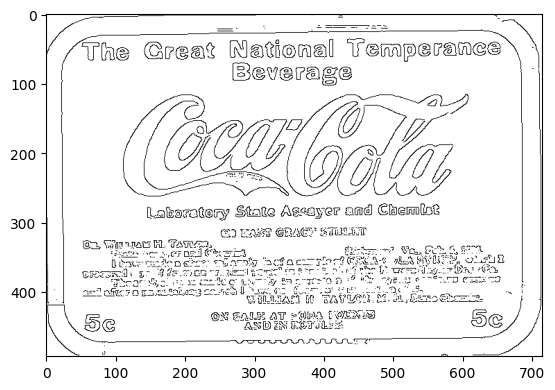

Cantidad de reducciones:  53
Tamaño template:  (312, 715)
Tamaño template:  (303, 694)
Tamaño template:  (294, 673)
Tamaño template:  (285, 653)
Tamaño template:  (276, 633)
Tamaño template:  (268, 614)
Tamaño template:  (260, 596)
Tamaño template:  (252, 578)
Tamaño template:  (244, 561)
Tamaño template:  (237, 544)
Tamaño template:  (230, 528)
Tamaño template:  (223, 512)
Tamaño template:  (216, 497)
Tamaño template:  (210, 482)
Tamaño template:  (204, 468)
Tamaño template:  (198, 454)
Tamaño template:  (192, 440)
Tamaño template:  (186, 427)
Tamaño template:  (180, 414)
Tamaño template:  (175, 402)
Tamaño template:  (170, 390)
Tamaño template:  (165, 378)
Tamaño template:  (160, 367)
Tamaño template:  (155, 356)
Tamaño template:  (150, 345)
Tamaño template:  (146, 335)
Tamaño template:  (142, 325)
Tamaño template:  (138, 315)
Tamaño template:  (134, 306)
Tamaño template:  (130, 297)
Tamaño template:  (126, 288)
Tamaño template:  (122, 279)
Tamaño template:  (118, 271)
Tamaño templat

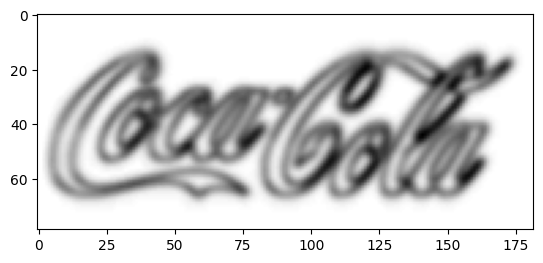

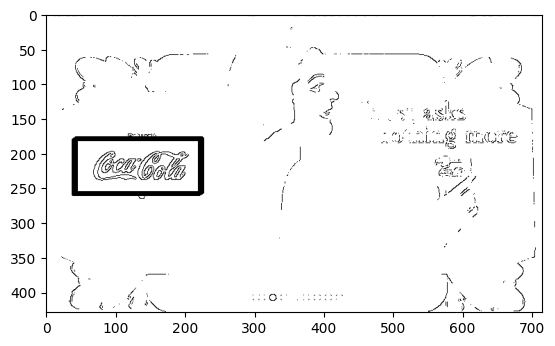

Cantidad de reducciones:  53
Tamaño template:  (300, 687)
Tamaño template:  (291, 666)
Tamaño template:  (282, 646)
Tamaño template:  (274, 627)
Tamaño template:  (266, 608)
Tamaño template:  (258, 590)
Tamaño template:  (250, 572)
Tamaño template:  (242, 555)
Tamaño template:  (235, 538)
Tamaño template:  (228, 522)
Tamaño template:  (221, 506)
Tamaño template:  (214, 491)
Tamaño template:  (208, 476)
Tamaño template:  (202, 462)
Tamaño template:  (196, 448)
Tamaño template:  (190, 435)
Tamaño template:  (184, 422)
Tamaño template:  (178, 409)
Tamaño template:  (173, 397)
Tamaño template:  (168, 385)
Tamaño template:  (163, 373)
Tamaño template:  (158, 362)
Tamaño template:  (153, 351)
Tamaño template:  (148, 340)
Tamaño template:  (144, 330)
Tamaño template:  (140, 320)
Tamaño template:  (136, 310)
Tamaño template:  (132, 301)
Tamaño template:  (128, 292)
Tamaño template:  (124, 283)
Tamaño template:  (120, 275)
Tamaño template:  (116, 267)
Tamaño template:  (113, 259)
Tamaño templat

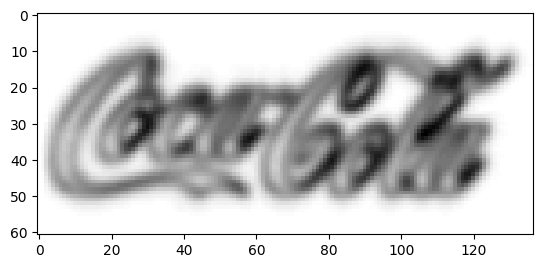

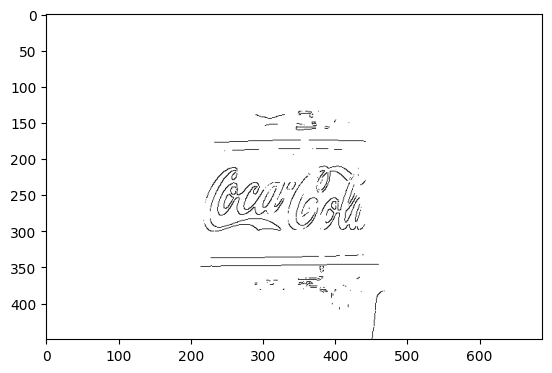

Cantidad de reducciones:  53
Tamaño template:  (607, 1389)
Tamaño template:  (589, 1347)
Tamaño template:  (571, 1307)
Tamaño template:  (554, 1268)
Tamaño template:  (537, 1230)
Tamaño template:  (521, 1193)
Tamaño template:  (505, 1157)
Tamaño template:  (490, 1122)
Tamaño template:  (475, 1088)
Tamaño template:  (461, 1055)
Tamaño template:  (447, 1023)
Tamaño template:  (434, 992)
Tamaño template:  (421, 962)
Tamaño template:  (408, 933)
Tamaño template:  (396, 905)
Tamaño template:  (384, 878)
Tamaño template:  (372, 852)
Tamaño template:  (361, 826)
Tamaño template:  (350, 801)
Tamaño template:  (340, 777)
Tamaño template:  (330, 754)
Tamaño template:  (320, 731)
Tamaño template:  (310, 709)
Tamaño template:  (301, 688)
Tamaño template:  (292, 667)
Tamaño template:  (283, 647)
Tamaño template:  (275, 628)
Tamaño template:  (267, 609)
Tamaño template:  (259, 591)
Tamaño template:  (251, 573)
Tamaño template:  (243, 556)
Tamaño template:  (236, 539)
Tamaño template:  (229, 523)
Tam

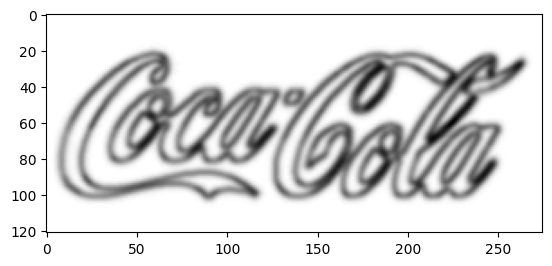

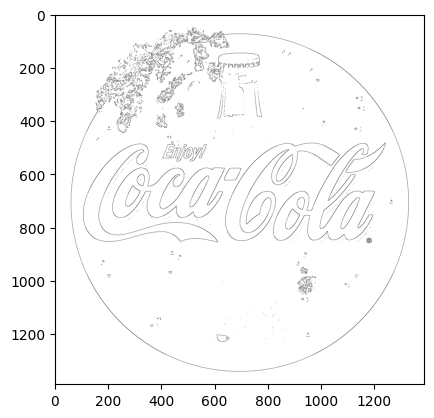

In [34]:
#Lista de imagenes a cargar
images = glob.glob('images/*.png')
images.extend(glob.glob('images/*.jpg'))

# Eliminar de la lista la que se llama coca_multi.png
images = [x for x in images if x != 'images\\coca_multi.png']

template_matching(images, 'template/pattern.png', 0.3)